<a href="https://colab.research.google.com/github/hablix/HandGestureDetector/blob/main/modelCreator03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://www.tensorflow.org/lite/tutorials/model_maker_image_classification

 hier längere beschreibung

Zel so umbauen das die vorgefertigte schnelle lösung mit den 180px datensatz funktioniert



HIER die einfachste schritt für schritt anleitung.
https://codelabs.developers.google.com/codelabs/recognize-flowers-with-tensorflow-on-android#4


HIER die Übersicht mit hintergrundwissen:
https://www.tensorflow.org/lite/examples/image_classification/overview






*   Listeneintrag
*   Listeneintrag
https://www.tensorflow.org/tutorials/images/classification




In [1]:
!pip install tflite-model-maker

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

     |████████████████████████████████| 501kB 5.2MB/s 
     |████████████████████████████████| 122kB 44.5MB/s 
     |████████████████████████████████| 174kB 53.2MB/s 
     |████████████████████████████████| 849kB 43.2MB/s 
     |████████████████████████████████| 645kB 31.9MB/s 
     |████████████████████████████████| 112kB 41.7MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 1.0MB 53.4MB/s 
     |████████████████████████████████| 1.2MB 42.3MB/s 
     |████████████████████████████████| 5.5MB 33.9MB/s 
     |████████████████████████████████| 706kB 47.5MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
     |████████████████████████████████| 37.6MB 89kB/s 
     |████████████████████████████████| 358kB 14.4MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 194kB 54.2MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=8b4fc7ca34456095a2da11286

In [2]:
print(tf.__version__)

2.4.1


In [3]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')

#dir_base = "/content/gdrive/MyDrive/experiment1/dataset-fruit/data"
#int_res=180
#dir_base = "/content/gdrive/MyDrive/experiment1/dataset-hand1/data"
#int_res=60
dir_base = "/content/gdrive/MyDrive/experiment1/dataset-hand1/data180"
int_res=180

dir_test = dir_base + "/test"
dir_test_d = pathlib.Path(dir_test)

dir_train = dir_base + "/train"
dir_train_d = pathlib.Path(dir_train)
dir_train_p = os.path.join(dir_base, 'train')

dir_test_d.absolute 

Mounted at /content/gdrive


<bound method Path.absolute of PosixPath('/content/gdrive/MyDrive/experiment1/dataset-hand1/data180/test')>

In [4]:
from pathlib import Path

all_count = len(list(Path(dir_base).glob('**/*')))
print("Number of all files: " + str(all_count))

image_count = sorted(dir_train_d.glob('**/*.jpg'))
print("Number of all images: " + str(all_count))

# Load data
data = ImageClassifierDataLoader.from_folder(dir_train_p)

# set trining validation split
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Number of all files: 902
Number of all images: 902
INFO:tensorflow:Load image with size: 891, num_label: 5, labels: fist, lettero, lettery, palm, thumbup.


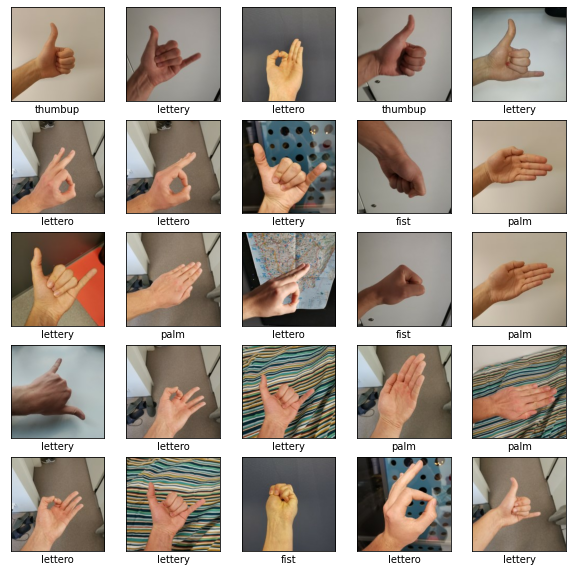

In [5]:
# Plot random images and classes
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

Args:
```

    train_data: Training data.
    model_spec: Specification for the model.
    validation_data: Validation data. If None, skips validation process.
    batch_size: Number of samples per training step. If `use_hub_library` is
      False, it represents the base learning rate when train batch size is 256
      and it's linear to the batch size.
    epochs: Number of epochs for training.
    train_whole_model: If true, the Hub module is trained together with the
      classification layer on top. Otherwise, only train the top classification
      layer.
    dropout_rate: The rate for dropout.
    learning_rate: Base learning rate when train batch size is 256. Linear to
      the batch size.
    momentum: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True.
    shuffle: Whether the data should be shuffled.
    use_augmentation: Use data augmentation for preprocessing.
    use_hub_library: Use `make_image_classifier_lib` from tensorflow hub to
      retrain the model.
    warmup_steps: Number of warmup steps for warmup schedule on learning rate.
      If None, the default warmup_steps is used which is the total training
      steps in two epochs. Only used when `use_hub_library` is False.
    model_dir: The location of the model checkpoint files. Only used when
      `use_hub_library` is False.
    do_train: Whether to run training.
    ```

In [6]:

model = image_classifier.create(
    train_data,
    #model_spec=model_spec.mobilenet_v2_spec, # OR
    #model_spec='efficientnet_lite0',
    validation_data=validation_data,
    epochs = 5
    batch_size=None,
    train_whole_model=None,
    dropout_rate=None,
    learning_rate=None,
    momentum=None,
    shuffle=False,
    use_augmentation=False,
    use_hub_library=True,
    warmup_steps=None,
    model_dir=None,
    do_train=True
    )

# ACHTUNG: dauert lange!!!

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
22/22 [==============================] - 125s 6s/step - loss: 1.7141 - accuracy: 0.2243 - val_loss: 1.3732 - val_accuracy: 0.3906
Epoch 2/5
22/22 [==============================] - 36s 2s/step - loss: 1.2582 - accuracy: 0.5415 - val_loss: 1.0671 - val_accuracy: 0.7344
Epoch 3/5
22/22 [==============================

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [8]:
loss, accuracy = model.evaluate(test_data)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



3/3 [==============================] - 21s 7s/step - loss: 0.8749 - accuracy: 0.8000
Test loss: 0.8748701214790344
Test accuracy: 0.800000011920929


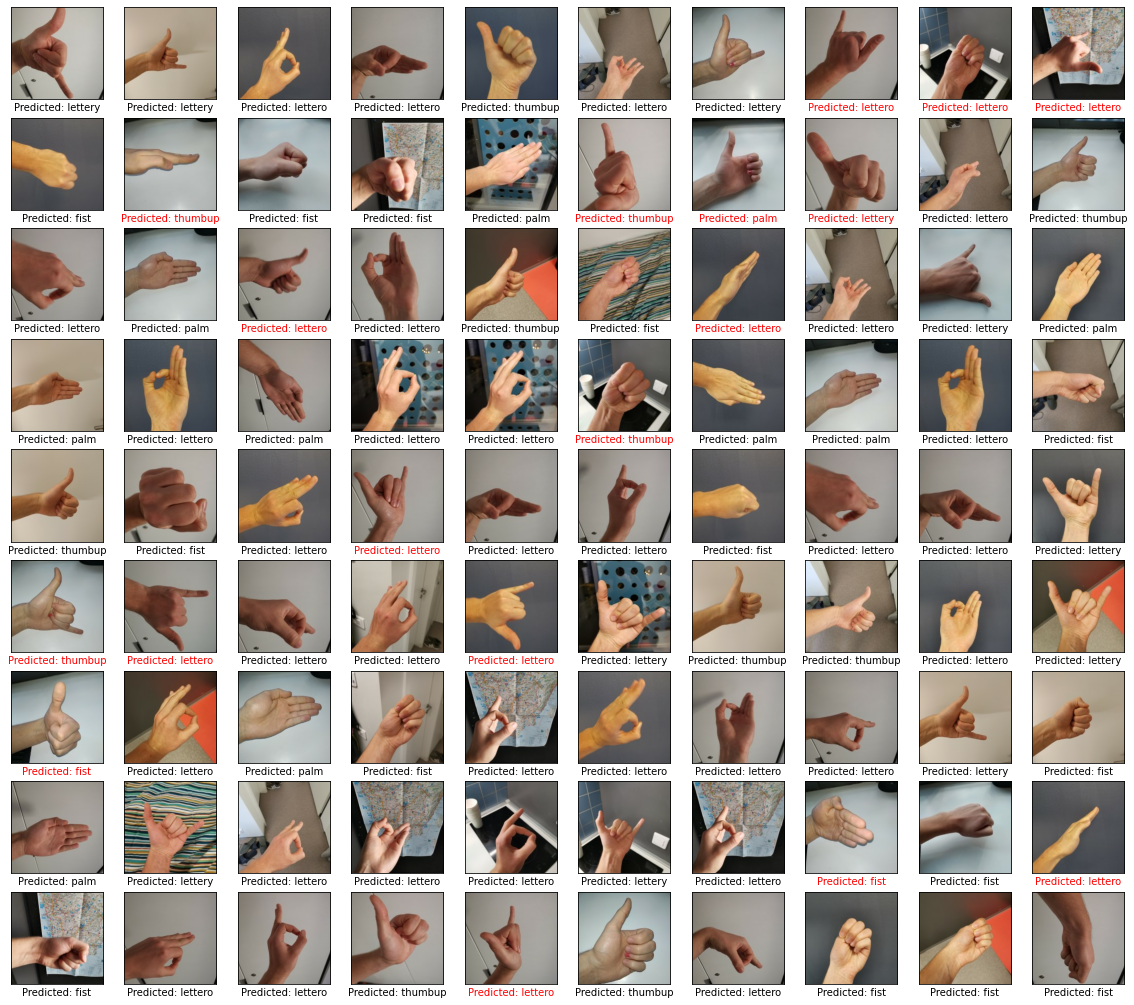

In [9]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/gdrive/MyDrive/experiment1/model/model_5', with_metadata=False)
# export, ENDE

INFO:tensorflow:Assets written to: /tmp/tmpcltjjesg/assets


INFO:tensorflow:Assets written to: /tmp/tmpcltjjesg/assets


INFO:tensorflow:Saving labels in /content/gdrive/MyDrive/experiment1/model/model_5/labels.txt.


INFO:tensorflow:Saving labels in /content/gdrive/MyDrive/experiment1/model/model_5/labels.txt.


In [ ]:
img_height = int_res
img_width = int_res
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_train_d,
  validation_split=0.2,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_train_d,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print('details')
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


Found 154 files belonging to 4 classes.
Using 124 files for training.
Found 154 files belonging to 4 classes.
Using 30 files for validation.
details
(32, 180, 180, 3)
(32,)


In [ ]:
class_names = train_ds.class_names
print(class_names)


['fist', 'lettery', 'palm', 'thumbup']


/content/gdrive/MyDrive/experiment1/dataset-hand1/data180/train/fist
/content/gdrive/MyDrive/experiment1/dataset-hand1/data180/train/lettery
/content/gdrive/MyDrive/experiment1/dataset-hand1/data180/train/palm
/content/gdrive/MyDrive/experiment1/dataset-hand1/data180/train/thumbup


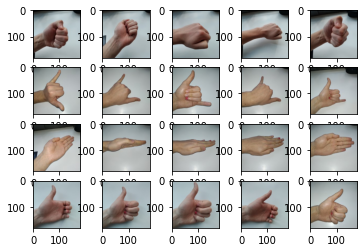

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
anz_x = 5
anz_y = len(class_names)
fig,ax = plt.subplots(anz_y,anz_x)


for i in range(0,anz_y):
  dir_class = dir_train + "/" + class_names[i]
  print(dir_class)
  dir_class_img = list(Path(dir_class).glob('**/*.jpg'))

  for j in range(0,anz_x):
    with open(dir_class_img[j],'rb') as f:
      image=Image.open(f)
      ax[i][j].imshow(image)
    #print(str(dir_class_img[j]) + ' i' + str(i) + ' j' + str(j))

fig.show()

In [ ]:
from tensorflow.keras import layers

# werte standardisieren
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# bilder rotieren, zoomen
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

#num classes
num_classes = 7 #5

#epochs
epochs = 6 #3

# model definieren
model = tf.keras.Sequential([
  #data_augmentation, # an oder ausschalten                           
  layers.experimental.preprocessing.Rescaling(1./255),

  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),


  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),

  #layers.Dropout(0.2), # an oder aus Ausfallen
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.summary()

Epoch 1/6
4/4 [==============================] - 6s 1s/step - loss: 1.7748 - accuracy: 0.1531 - val_loss: 1.4658 - val_accuracy: 0.0667
Epoch 2/6
4/4 [==============================] - 5s 1s/step - loss: 1.3974 - accuracy: 0.2984 - val_loss: 1.3269 - val_accuracy: 0.1667
Epoch 3/6
4/4 [==============================] - 5s 1s/step - loss: 1.3236 - accuracy: 0.3465 - val_loss: 1.3121 - val_accuracy: 0.4333
Epoch 4/6
4/4 [==============================] - 5s 1s/step - loss: 1.2065 - accuracy: 0.5450 - val_loss: 1.1692 - val_accuracy: 0.4000
Epoch 5/6
4/4 [==============================] - 5s 1s/step - loss: 1.0153 - accuracy: 0.6130 - val_loss: 0.9114 - val_accuracy: 0.7000
Epoch 6/6
4/4 [==============================] - 5s 1s/step - loss: 0.7895 - accuracy: 0.7108 - val_loss: 0.8295 - val_accuracy: 0.7000
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss: 0.7622971534729004
Test accuracy: 0.7338709831237793


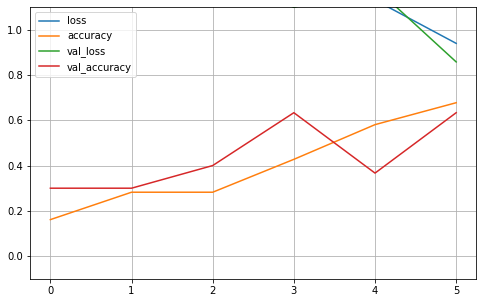

In [ ]:
score = model.evaluate_generator(train_ds)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(-0.1,1.1)
plt.show()

In [ ]:
example_file = dir_test + "/3.jpg"

img = tf.keras.preprocessing.image.load_img(
    example_file, target_size=(int_res, int_res)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to '{}' with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



This image most likely belongs to 'thumbup' with a 51.16% confidence.


In [ ]:
model.save('/content/gdrive/MyDrive/experiment1/model/model_1')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/experiment1/model/model_1/assets


In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/gdrive/MyDrive/experiment1/model/model_1') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('/content/gdrive/MyDrive/experiment1/model/my_model.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert as lite
#from tensorflow.contrib import lite

print( tf.version )

converter = tf.lite.TFLiteConverter.from_keras_model_file( '/content/gdrive/MyDrive/experiment1/model/my_model.h5')
tfmodel = converter.convert()
open ("/content/gdrive/MyDrive/experiment1/model/my_model.tflite" , "wb") .write(tfmodel)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


AttributeError: ignored

In [ ]:
import tensorflow as tf

img = tf.placeholder(name="img", dtype=tf.float32, shape=(1, 64, 64, 3))
val = img + tf.constant([1., 2., 3.]) + tf.constant([1., 4., 4.])
out = tf.identity(val, name="out")

with tf.Session() as sess:
  tflite_model = tf.contrib.lite.toco_convert(sess.graph_def, [img], [out])
  open("converteds_model.tflite", "wb").write(tflite_model)